## Nina Care Assessment

Background Info:
For this assessment, we ask you to imagine you are working as Product Analyst. You have just been briefed on your newest assignment:
Heads-up. The questions we are asking you are difficult to answer. Also for me, whilst I have all the context. Please give it your best-estimated guess! We just want to see how you think, don't worry about wrong or right.

Dataset: https://docs.google.com/spreadsheets/d/17EJ3R9IRmFGPPa1Ge8-s2LqBsXr5zqdBrCJml8HI78Y

Assessment by: Andy Ho

### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from tabulate import tabulate

### Loading Fact Order CSV into dataframe

In [2]:
# Read data from Fact Orders CSV file into a dataframe
df_FactOrder = pd.read_csv('Fact_orders - fact_orders.csv')

# Connect to an in-memory SQLite3 database
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

# Create a table in the database and insert the DataFrame data
df_FactOrder.to_sql('fact_orders', conn, index=False)

137988

### First Observations

In [3]:
# First observations of the table
df_FactOrder.info()
print("The table dimensions are:",df_FactOrder.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137988 entries, 0 to 137987
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 137988 non-null  object 
 1   booking_id               137988 non-null  object 
 2   customer_id              137988 non-null  object 
 3   net_revenue              137988 non-null  float64
 4   gross_merchandise_value  137988 non-null  float64
 5   date_of_checkout         137988 non-null  object 
 6   date_of_travel           137988 non-null  object 
 7   activity_category        131254 non-null  object 
 8   device_id                137988 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 9.5+ MB
The table dimensions are: (137988, 9)


In [4]:
df_FactOrder.head()

,order_id,booking_id,customer_id,net_revenue,gross_merchandise_value,date_of_checkout,date_of_travel,activity_category,device_id
0,ea647a26545133eb1178627c660eb307,79110c8c61651a17c71d36d1ff400902,2e08815f0bc331f3c8239676b9755701,76.416113,362.809890,2017-08-04T23:31:19.000+02:00,2017-08-06T20:00:00.000+02:00,City Cruise,1
1,c9d995fdd3f8f46113f72719428e58c0,cb3f1a6b758322c3750297bbbba75162,99a84ab22128410a7ca82a8848314880,30.105888,100.377201,2018-07-08T15:48:15.000+02:00,2018-07-11T12:15:00.000+02:00,City Cruise,3
2,838a05584192eab5758dc76eb8754382,1d84c6ef74f4213bc111a31230e75d18,7d2de46dab587a091d4d795f3466ec02,16.083138,41.534976,2017-08-17T15:45:36.000+02:00,2017-08-17T09:30:00.000+02:00,Attraction Ticket,3
3,c552f12c32f6e4eaf8b67b088ba263ed,bf7f177122241fb49d8905a3c22a28c8,c8899bd2bdc56ef116a38ec0f2c2cfa2,13.950031,76.161595,2017-08-31T05:33:30.000+02:00,2017-09-02T14:15:00.000+02:00,Attraction Ticket,2
4,7474f90401e812a747c518061a0e964c,2b1b6db082b298d7a69d683d9415ecfe,e408bdd3d03e4f4189f48f0e8e9c2ec2,12.713799,51.909630,2018-08-20T19:35:47.000+02:00,2018-08-21T10:00:00.000+02:00,Attraction Ticket,2


In [5]:
df_FactOrder.describe()

,net_revenue,gross_merchandise_value,device_id
count,137988.000000,137988.000000,137988.000000
mean,33.051721,132.356857,1.730984
std,35.736766,141.728076,0.910517
min,-19.549436,0.000000,1.000000
25%,12.573208,50.988515,1.000000
50%,23.536890,92.075054,2.000000
75%,41.328937,163.994676,2.000000
max,1143.417760,5251.720124,5.000000


In [6]:
df_FactOrder.nunique()

order_id                   123597
booking_id                 131431
customer_id                 98631
net_revenue                 17746
gross_merchandise_value     29493
date_of_checkout           123431
date_of_travel              34344
activity_category              11
device_id                       5
dtype: int64

In [7]:
df_FactOrder.isnull().sum()

order_id                      0
booking_id                    0
customer_id                   0
net_revenue                   0
gross_merchandise_value       0
date_of_checkout              0
date_of_travel                0
activity_category          6734
device_id                     0
dtype: int64

## Task 1:
Clean the dataset. Point out anything you find that required cleaning.

In [8]:
# Remove any potential leading or trailing whitespaces in the columns
# Convert activity_category column to upper and snakecase
# Remove Duplicate rows

df_FactOrder = df_FactOrder.applymap(lambda x: x.strip() if isinstance(x, str) else x)\
                  .assign(activity_category=lambda x: x['activity_category'].str.upper().str.replace(' ', '_'))\
                  .drop_duplicates()

#Convert the date_of_checkout and date_of_travel columns to datetime
df_FactOrder["date_of_checkout"] = pd.to_datetime(df_FactOrder["date_of_checkout"], utc=True)
df_FactOrder["date_of_travel"] = pd.to_datetime(df_FactOrder["date_of_travel"], utc=True)

df_FactOrder.head()


,order_id,booking_id,customer_id,net_revenue,gross_merchandise_value,date_of_checkout,date_of_travel,activity_category,device_id
0,ea647a26545133eb1178627c660eb307,79110c8c61651a17c71d36d1ff400902,2e08815f0bc331f3c8239676b9755701,76.416113,362.809890,2017-08-04 21:31:19+00:00,2017-08-06 18:00:00+00:00,CITY_CRUISE,1
1,c9d995fdd3f8f46113f72719428e58c0,cb3f1a6b758322c3750297bbbba75162,99a84ab22128410a7ca82a8848314880,30.105888,100.377201,2018-07-08 13:48:15+00:00,2018-07-11 10:15:00+00:00,CITY_CRUISE,3
2,838a05584192eab5758dc76eb8754382,1d84c6ef74f4213bc111a31230e75d18,7d2de46dab587a091d4d795f3466ec02,16.083138,41.534976,2017-08-17 13:45:36+00:00,2017-08-17 07:30:00+00:00,ATTRACTION_TICKET,3
3,c552f12c32f6e4eaf8b67b088ba263ed,bf7f177122241fb49d8905a3c22a28c8,c8899bd2bdc56ef116a38ec0f2c2cfa2,13.950031,76.161595,2017-08-31 03:33:30+00:00,2017-09-02 12:15:00+00:00,ATTRACTION_TICKET,2
4,7474f90401e812a747c518061a0e964c,2b1b6db082b298d7a69d683d9415ecfe,e408bdd3d03e4f4189f48f0e8e9c2ec2,12.713799,51.909630,2018-08-20 17:35:47+00:00,2018-08-21 08:00:00+00:00,ATTRACTION_TICKET,2


## Data Management and Analysis Best Practice Reasoning:

Removing Whitespace:

1.   Ensures data cleanliness and integrity by eliminating unnecessary whitespaces that might be present at the beginning or end of the text values.
2.   Prevents potential issues caused by inconsistent whitespace usage, such as unintentional differences during comparisons or unintended filtering results.

Converting to Upper Case:

1.   Ensures consistency and uniformity across text values, eliminating mixed-case variations and simplifying comparisons or sorting.
2.   Enhances readability, making it easier to comprehend text values, especially when displaying or sharing with others.
3.   Facilitates efficient search and filtering through case-insensitive matching, improving data retrieval accuracy and efficiency.

Using Snake Case:

1.   Enhances data accuracy and eliminates redundancy by removing rows that contain identical data across all columns.
2.   Prevents potential errors or biases that may arise from duplicate records during analysis or reporting.
3.   Maintains consistency throughout a dataset, simplifying data exploration, analysis, and reporting by creating a unified structure for identifying and accessing specific attributes or variables.

Removing Duplicate Rows:

1.   Enhances readability and clarity by visually separating words with underscores, improving understanding of compound terms.
2.   Aligns with programming practices, enabling seamless integration with data processing pipelines, APIs, and code libraries.
3.   Removes uncessary computational strain or duplication of results.

## Addressing null Values

In [9]:
df_FactOrder['activity_category'] = df_FactOrder['activity_category'].fillna('UNKNOWN')

Reasoning:
Handling null values in a dataset is a task that heavily depends on the scope of requirements. Null (or NaN) values can arise due to various reasons such as missing data, incomplete records, or data entry errors.

In this assessment, we will explore the complexities associated with null values and propose an initial approach for handling them.

Addressing null values involves making decisions that align with the purpose and context of the data. For **machine learning preprocessing,** filling null values with mean, mode, or median using backward or forward fill methods (bfill or ffill) is a common practice. However, it's important to consider the implications of such imputation techniques:


*    Potential Data Skew: Filling null values with statistical measures like mean, mode, or median can introduce bias and skew the distribution of the data. This could impact the accuracy and reliability of subsequent machine learning models.

**For analysis purposes,** a deeper understanding of why null values exist is essential. It involves investigating the underlying reasons for the null values and making informed decisions accordingly:

1.   Determining Accuracy: Assessing the accuracy and reliability of null values is crucial. Are they genuinely missing, or do they hold a specific meaning within the data? Understanding the nature and context of null values helps to avoid incorrect assumptions during analysis.
2.   Engaging Stakeholders: If null values are encountered, reaching out to the data owner or relevant stakeholders might be necessary. Discussing the reasons behind the null values can provide valuable insights and clarify any ambiguities. Collaborating with domain experts helps in determining the appropriate course of action.


Considering the above challenges and for the sake of this assignment, we will classify null values in activity_category as 'UNKNOWN', as they are, in contrast to the 'OTHER' value, to designate them as a separate category. However, it's important to note that this is an initial approach, and further discussion and analysis are necessary to determine the correct categories and treatment for null values.


In [10]:
df_FactOrder.head()

,order_id,booking_id,customer_id,net_revenue,gross_merchandise_value,date_of_checkout,date_of_travel,activity_category,device_id
0,ea647a26545133eb1178627c660eb307,79110c8c61651a17c71d36d1ff400902,2e08815f0bc331f3c8239676b9755701,76.416113,362.809890,2017-08-04 21:31:19+00:00,2017-08-06 18:00:00+00:00,CITY_CRUISE,1
1,c9d995fdd3f8f46113f72719428e58c0,cb3f1a6b758322c3750297bbbba75162,99a84ab22128410a7ca82a8848314880,30.105888,100.377201,2018-07-08 13:48:15+00:00,2018-07-11 10:15:00+00:00,CITY_CRUISE,3
2,838a05584192eab5758dc76eb8754382,1d84c6ef74f4213bc111a31230e75d18,7d2de46dab587a091d4d795f3466ec02,16.083138,41.534976,2017-08-17 13:45:36+00:00,2017-08-17 07:30:00+00:00,ATTRACTION_TICKET,3
3,c552f12c32f6e4eaf8b67b088ba263ed,bf7f177122241fb49d8905a3c22a28c8,c8899bd2bdc56ef116a38ec0f2c2cfa2,13.950031,76.161595,2017-08-31 03:33:30+00:00,2017-09-02 12:15:00+00:00,ATTRACTION_TICKET,2
4,7474f90401e812a747c518061a0e964c,2b1b6db082b298d7a69d683d9415ecfe,e408bdd3d03e4f4189f48f0e8e9c2ec2,12.713799,51.909630,2018-08-20 17:35:47+00:00,2018-08-21 08:00:00+00:00,ATTRACTION_TICKET,2


In [11]:
# Create a cleaned csv version
df_FactOrder.to_csv('cleaned_fact_orders.csv', index=False)

## Task 2.
Plot a count of bookings over time. Point out anything you notice about the timeseries.




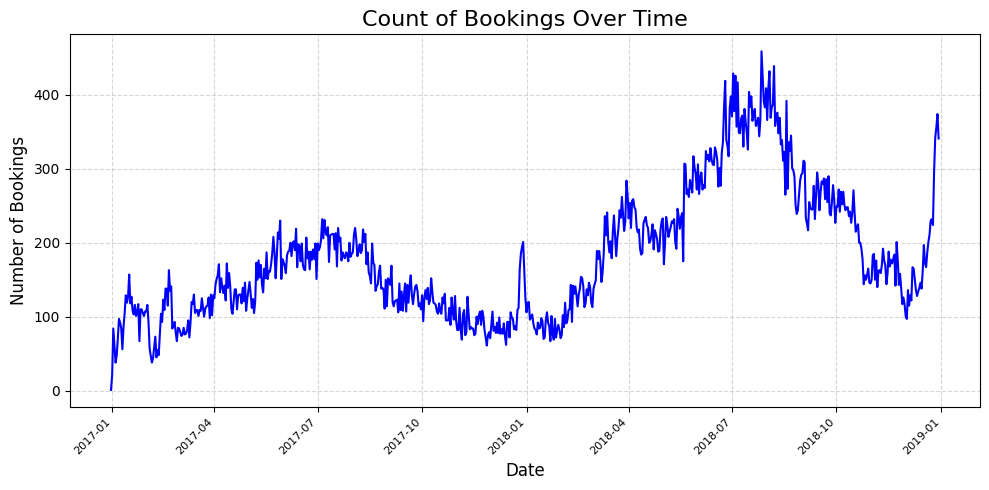

In [12]:
# Extract the date from the "date_of_checkout" column
df_FactOrder["date"] = df_FactOrder["date_of_checkout"].dt.date

# Group the data by date and count the number of bookings
bookings_count = df_FactOrder.groupby("date")["booking_id"].count().reset_index()

# Plot the count of bookings over time
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="booking_id", data=bookings_count, color="blue")
plt.title("Count of Bookings Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

> This time series, along with further insight, is available in a Looker Studio dashboard for interested stakeholders: https://lookerstudio.google.com/u/0/reporting/c7ce0992-f20d-4b9d-a446-2e389c1caed7/page/p_ctkfyqft5c

Based solely on the time series analysis there are noticeable uptrends in bookings around the December time frame. However, it is important to note that accurately plotting the bookings would require data on the date of booking, rather than just the date of **checkout or travel**. To ensure accuracy, it is recommended to reconfirm this information with stakeholders or obtain data specifically related to booking dates.

Furthermore, when comparing the growth of bookings, it can be observed that 2018 was a relatively slow year in comparison to the growth achieved in previous years. This suggests that there might have been a deceleration or stagnation in bookings during that particular year.

Please note that these conclusions are based on the analysis solely of the time series data, and further insights and confirmation from relevant stakeholders would be necessary to provide a comprehensive understanding of the booking trends and their underlying factors.


In [13]:
# Finding the most recent travel date from customers
fact_orders = pd.read_sql_query("""
WITH most_recent_booking AS (
     SELECT
        customer_id,
        booking_id,
        date_of_checkout,
        ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY date_of_checkout DESC) AS row
     FROM fact_orders
     GROUP BY activity_category
)

SELECT *
FROM most_recent_booking
WHERE row = 1
""", conn)

# Print the results as a formatted table
print(tabulate(fact_orders, headers='keys', tablefmt='psql'))

+----+----------------------------------+----------------------------------+-------------------------------+-------+
|    | customer_id                      | booking_id                       | date_of_checkout              |   row |
|----+----------------------------------+----------------------------------+-------------------------------+-------|
|  0 | 0158ae399b3fd436cb46d77efabbe370 | 2fd413ede756ab42678c4765ae1db6be | 2018-12-30T23:02:04.000+01:00 |     1 |
|  1 | 172803d7f23a99e69c001f957aa3ac12 | c0786d73cf3e0e51a70f1345419267b2 | 2018-06-24T15:50:38.000+02:00 |     1 |
|  2 | 1902796bbec692bd25d880e16c128401 | b7251ae1b144623f86376aac68d66c29 | 2018-07-26T18:13:14.000+02:00 |     1 |
|  3 | 2e08815f0bc331f3c8239676b9755701 | 79110c8c61651a17c71d36d1ff400902 | 2017-08-04T23:31:19.000+02:00 |     1 |
|  4 | 4a25183eaf46d11cecfbe244290d7cf0 | 68740f32b153de1f26754f2ac11de12c | 2017-06-08T21:46:07.000+02:00 |     1 |
|  5 | 534c4dce89712e227075f0c9e99f08c0 | e941cb741294ce6b453f68

## Task 3.
Analyse our activity categories. Tell us anything interesting you find about how they differ in net revenue (NR) and gross merchandise value (GMV). Are there other differences between categories that you notice?


In [14]:
# Summing net revenue by activity_category in SQL
fact_orders = pd.read_sql_query("""
WITH sum_activity AS (
     SELECT
        activity_category,
        SUM(net_revenue) AS sum_net_revenue,
        SUM(gross_merchandise_value) AS sum_gmv
     FROM fact_orders
     GROUP BY activity_category
)

SELECT *,
   sum_net_revenue / sum_gmv AS profit_ratio
FROM sum_activity
""", conn)

# Print the results as a formatted table
print(tabulate(fact_orders, headers='keys', tablefmt='psql'))

+----+-------------------------+-------------------+------------------+----------------+
|    | activity_category       |   sum_net_revenue |          sum_gmv |   profit_ratio |
|----+-------------------------+-------------------+------------------+----------------|
|  0 |                         |  238968           | 964066           |       0.247875 |
|  1 | Attraction Ticket       |       1.06471e+06 |      4.27689e+06 |       0.248944 |
|  2 | Attraction Walking Tour |  480817           |      2.66228e+06 |       0.180603 |
|  3 | City Card               |   51041.3         | 282965           |       0.18038  |
|  4 | City Cruise             |  473578           |      1.60672e+06 |       0.294748 |
|  5 | City Motorized Tour     |  420536           |      1.65635e+06 |       0.253893 |
|  6 | City Walking Tour       |  233568           | 901835           |       0.258992 |
|  7 | Day Trip                |       1.21391e+06 |      4.45592e+06 |       0.272426 |
|  8 | Hop On Hop Off

Analysing the sum of net revenue by activity category, it is evident that the "Day Trip and Attraction Ticket" category stands out with significantly higher revenue figures. This indicates that customers are willing to spend more on day trips and attraction tickets, potentially due to the unique experiences and attractions offered. In addition, Day Trips yield one of the highest returns along with generating the most revenue.

Understanding the contributing factors can provide valuable insights for decision-making and future business planning to capitalise on its revenue-generating potential.


> Further insight, is available in a Looker Studio dashboard for interested stakeholders: https://lookerstudio.google.com/u/0/reporting/c7ce0992-f20d-4b9d-a446-2e389c1caed7/page/p_ctkfyqft5c

In [15]:
# Summing net revenue by activity_category in SQL
fact_orders = pd.read_sql_query("""
     SELECT
        customer_id,
        SUM(net_revenue) AS sum_net_revenue
     FROM fact_orders
     GROUP BY customer_id
     ORDER BY sum_net_revenue DESC
""", conn)

# Print the results as a formatted table in descending order
print(tabulate(fact_orders.head(10), headers='keys', tablefmt='psql', showindex=False))


+----------------------------------+-------------------+
| customer_id                      |   sum_net_revenue |
|----------------------------------+-------------------|
| d8a85abbcc4f5124d274acf28e244961 |          45060.9  |
| 6a63f81fec0862f167025f1944190f72 |           8446.02 |
| 534c4dce89712e227075f0c9e99f08c0 |           5956.01 |
| 4754d05cbb98740965e07b51b07e3501 |           5111.5  |
| 78a848605a59d983ee5850b13be94a81 |           2754.09 |
| c4f0ffa7d16c548adb8fb66fa00c2221 |           2484.58 |
| 3c03b3502017eb8342a0bc5c38231be1 |           2367.57 |
| 055fd09f21b5bcb0622fc6900241e650 |           2267.13 |
| d14ad437891dbceb198b97d5e1eb81a1 |           1809.47 |
| 141a3a7298fbaffbf117ccc00848d452 |           1774.84 |
+----------------------------------+-------------------+


It's also worth noting customer_id: d8a85abbcc4f5124d274acf28e244961 has significantly higher net revenue in comparison to others.

## Task 4.
Some devices have unique booking behaviour. What is unique about device_ids 4 and 5?


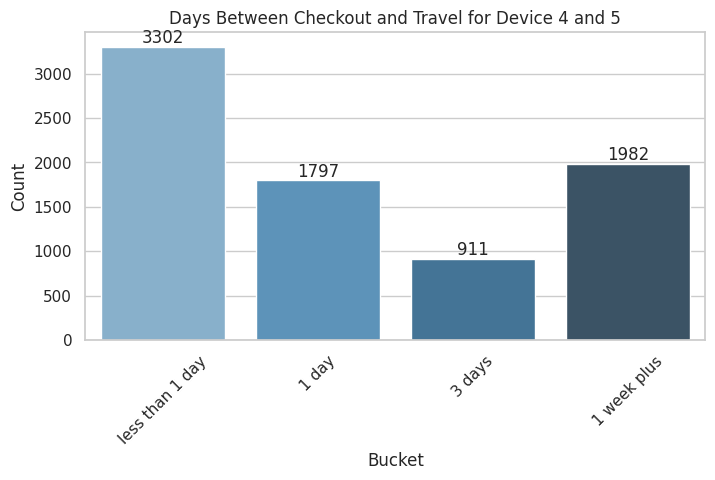

In [17]:
# Looking into time interval between checkout and travel for device 4 and 5
fact_orders = pd.read_sql_query("""
WITH time_between_checkout_travel AS (
     SELECT
        customer_id,
        booking_id,
        date_of_checkout,
        date_of_travel,
        device_id,
        (julianday(date_of_travel) - julianday(date_of_checkout)) AS time_between_checkout_travel
     FROM fact_orders
     WHERE device_id IN (4, 5)
)

SELECT *
FROM time_between_checkout_travel
""", conn)
#################################### Sorting Days from Checkout -> Activity into buckets################################
####################################### #################################### ###########################################
# Define the custom bins and labels
bins = [0, 1, 3, 7, np.inf]
labels = ['less than 1 day', '1 day', '3 days', '1 week plus']

# Assign the data points to their respective buckets and count occurrences
bucket_counts = (
    fact_orders
    .assign(bucket=lambda x: pd.cut(x['time_between_checkout_travel'], bins=bins, labels=labels, right=False))
    ['bucket']
    .value_counts()
    .reindex(labels)
)

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the chart
plt.figure(figsize=(8, 4))
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette="Blues_d")
plt.xlabel('Bucket')
plt.ylabel('Count')
plt.title('Days Between Checkout and Travel for Device 4 and 5')
plt.xticks(rotation=45)

# Add value labels to the bars
for i, count in enumerate(bucket_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.show()


Further analysis can be drawn from the dashboard: https://lookerstudio.google.com/u/0/reporting/c7ce0992-f20d-4b9d-a446-2e389c1caed7